In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None

In [2]:
#load the data
wodsDF = pd.read_csv('../data/processed/wodsCleaned.csv')
wodsDF.head()

,Name,href,Views,Likes,ForTime,EMOM,AMRAP,run,pull up,push up,...,waiter,slam ball,swim,triple under,up down,suitcase,hip extension,row cal,burden carry,TotalVol
0,MURPH,https://wodwell.com/wod/murph,345700.0,2300.0,True,False,False,1600.0,100.0,200.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2200.0
1,DT,https://wodwell.com/wod/dt,389600.0,2100.0,True,False,False,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135.0
2,CINDY,https://wodwell.com/wod/cindy,305300.0,2400.0,False,False,True,0.0,30.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181.0
3,BEAR COMPLEX,https://wodwell.com/wod/bear-complex,335400.0,1500.0,True,False,False,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
4,FIGHT GONE BAD,https://wodwell.com/wod/fight-gone-bad,262600.0,877.0,True,False,False,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0


# Data Story

our target is Likes, we begin by plotting our movements against Likes to see if any specific movement seems to correlate to a high number of likes.

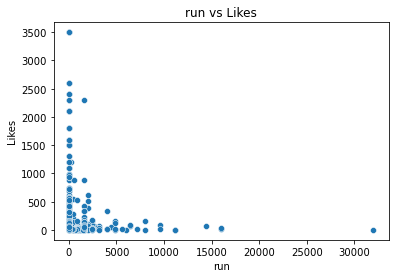

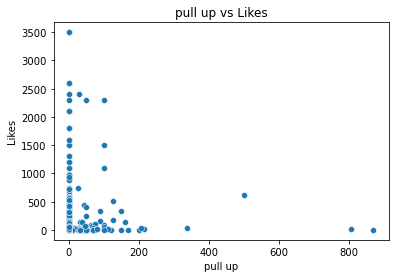

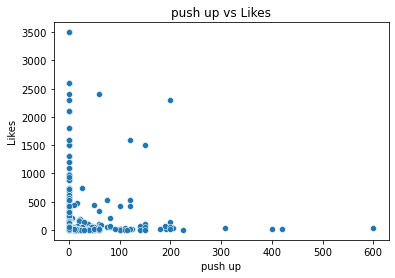

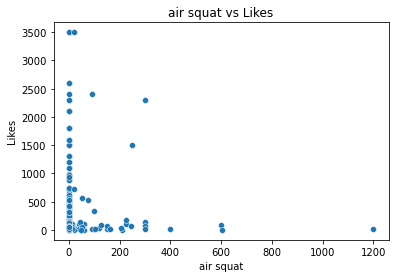

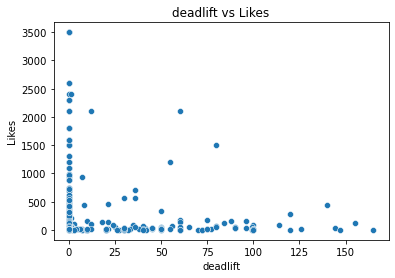

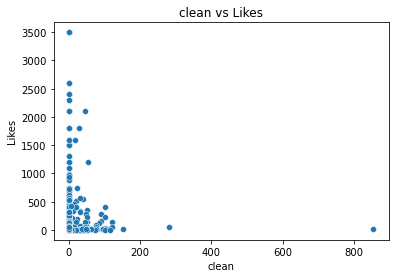

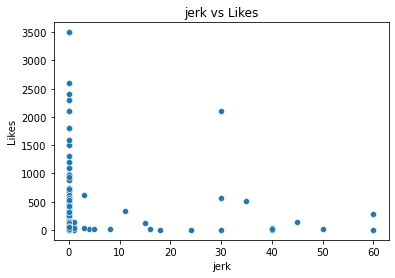

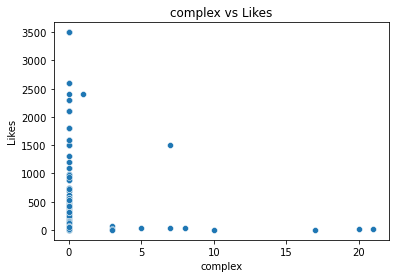

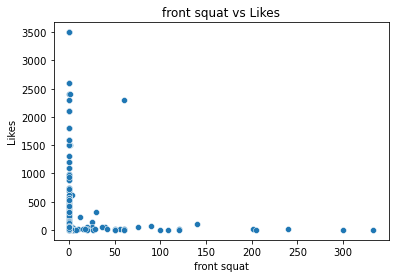

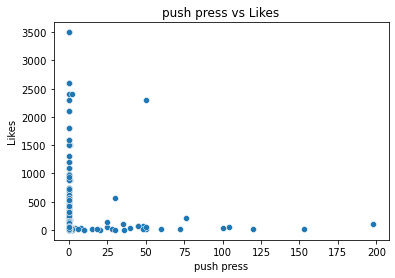

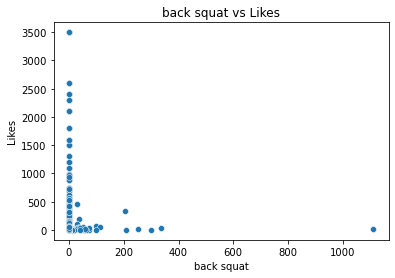

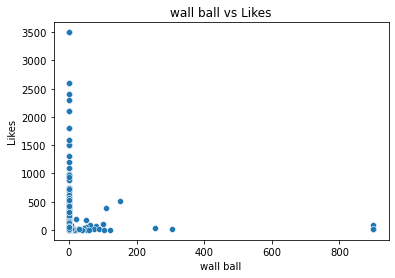

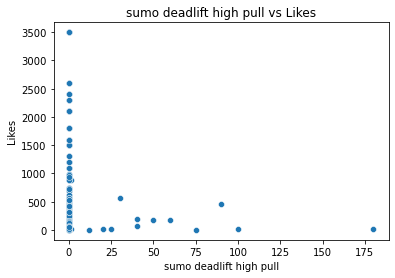

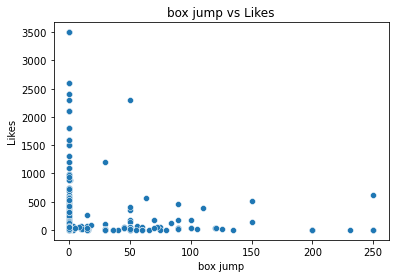

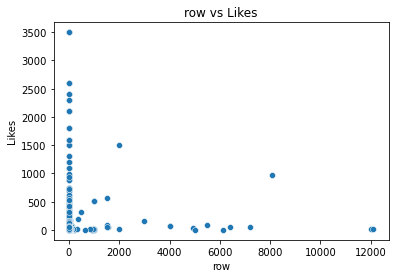

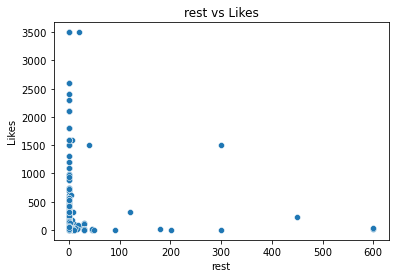

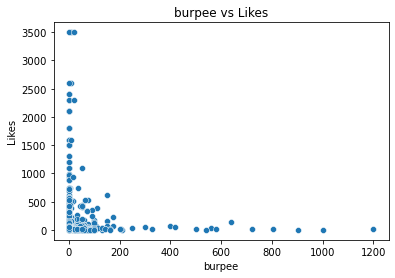

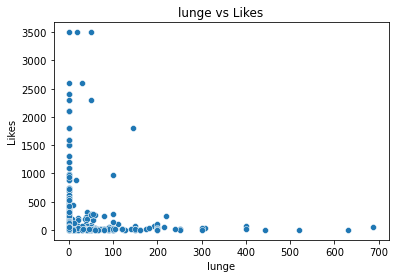

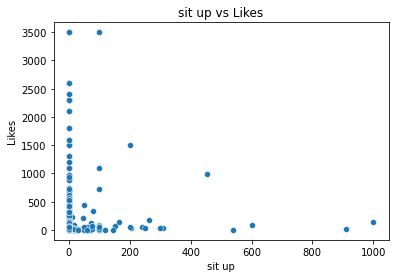

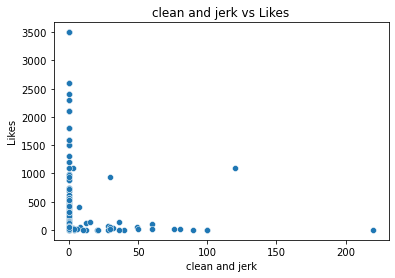

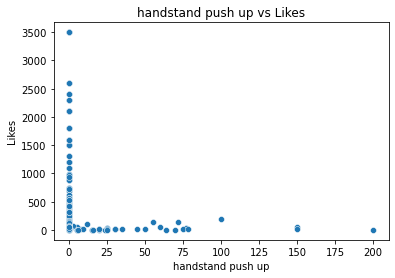

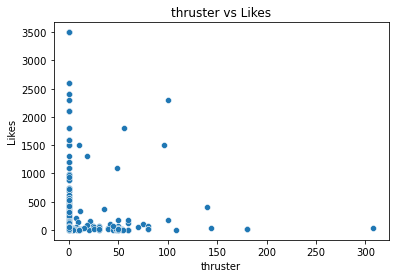

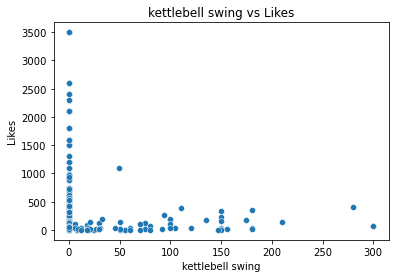

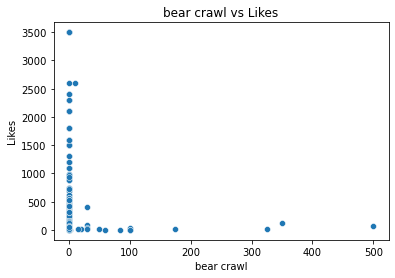

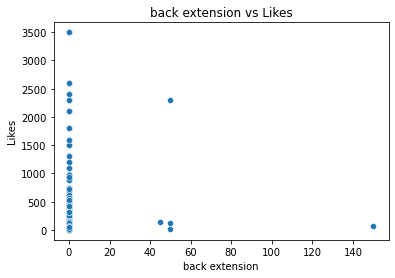

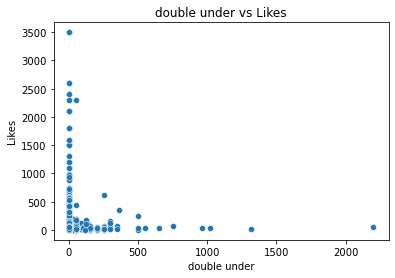

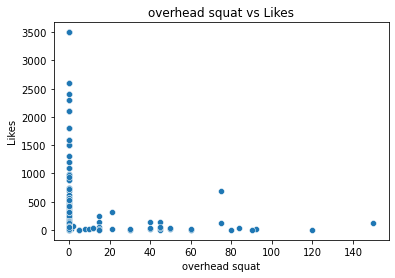

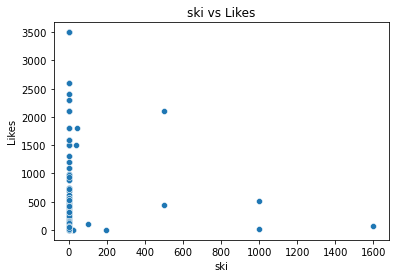

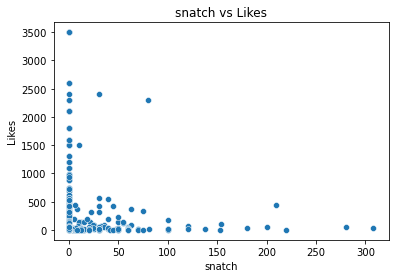

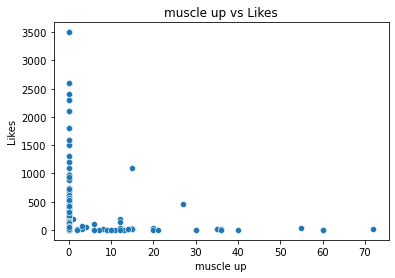

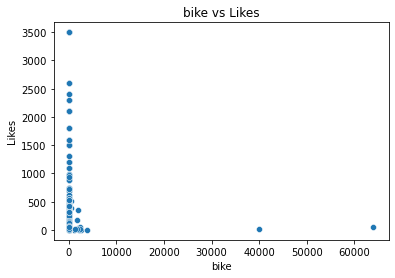

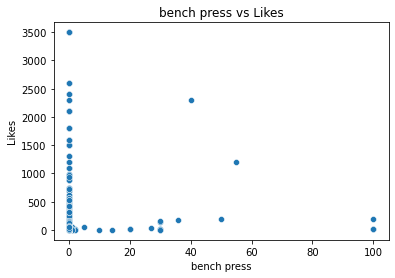

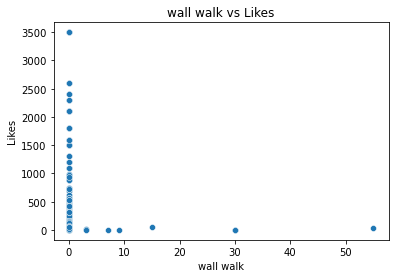

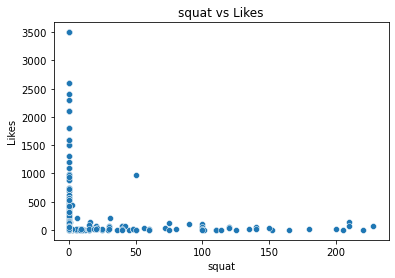

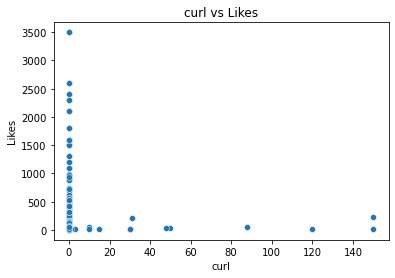

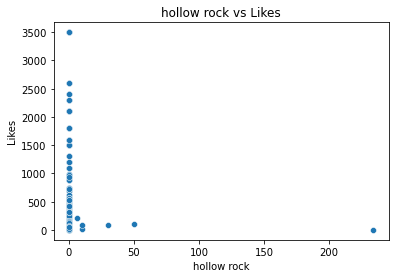

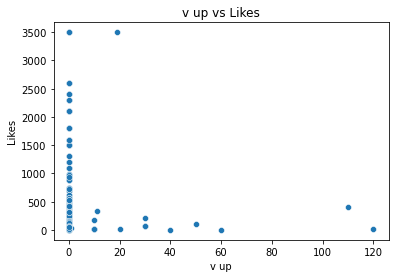

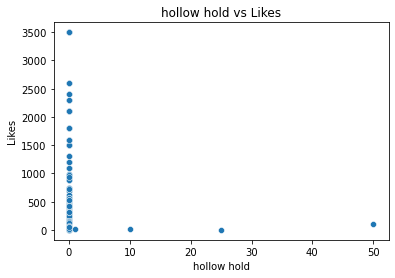

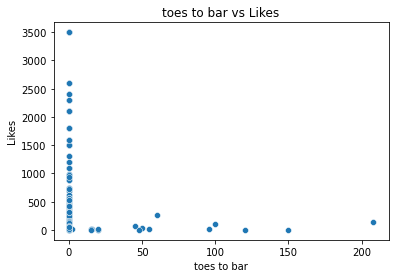

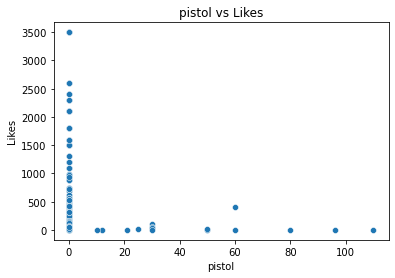

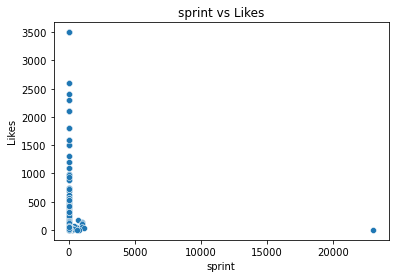

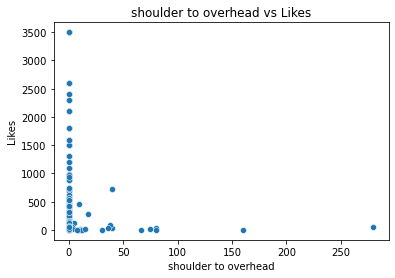

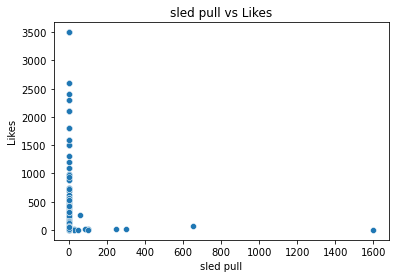

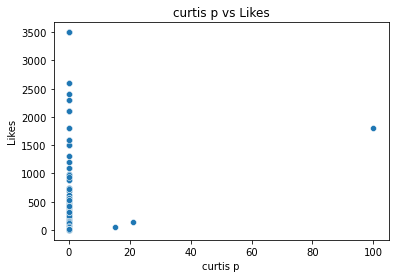

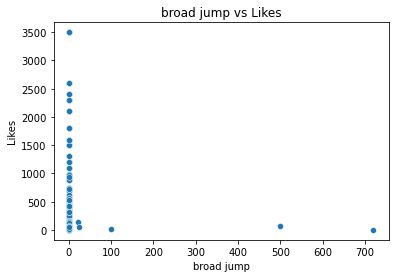

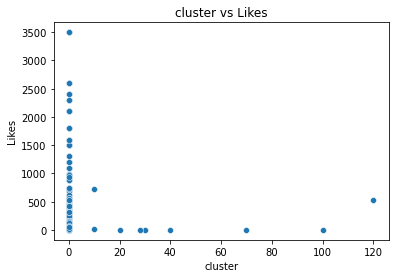

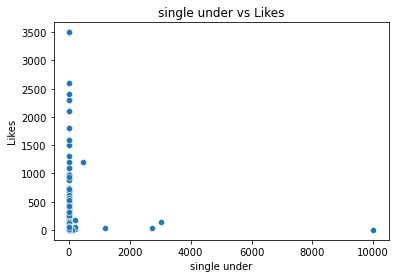

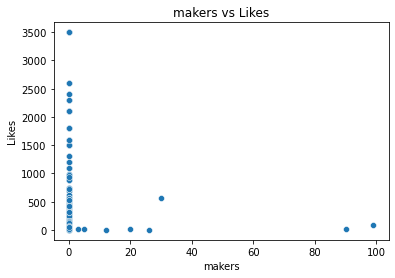

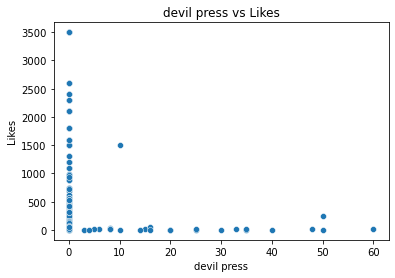

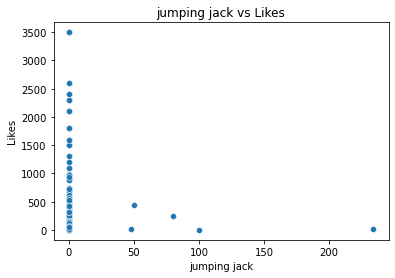

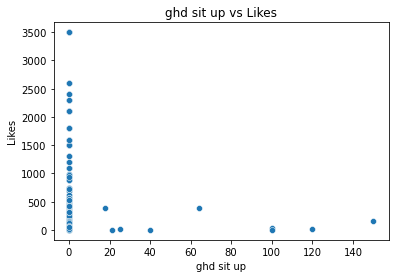

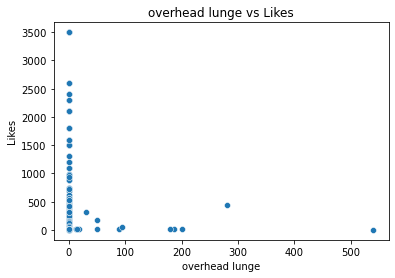

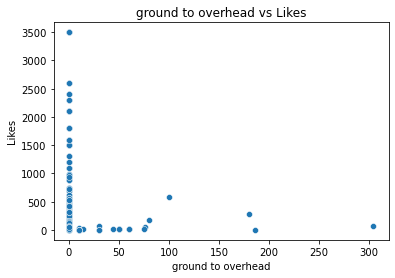

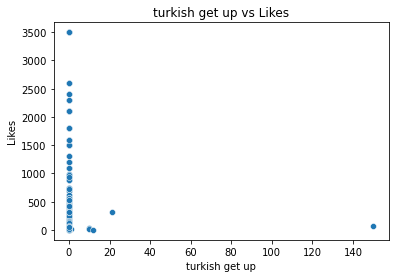

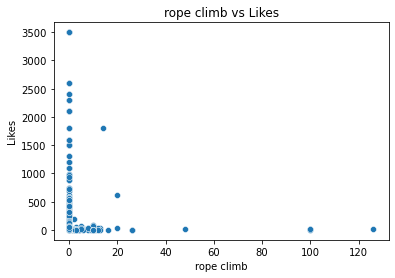

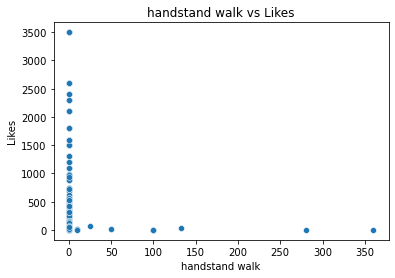

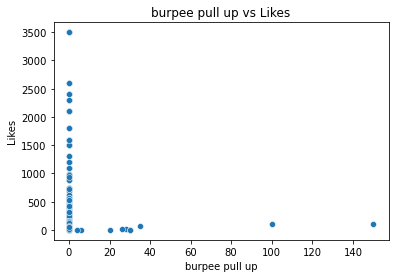

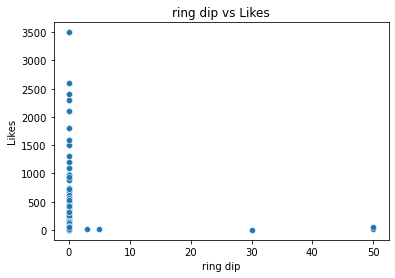

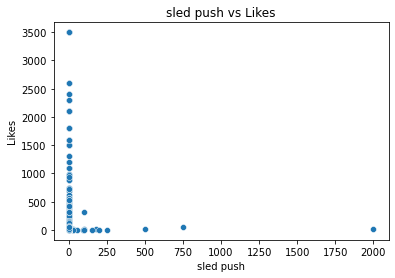

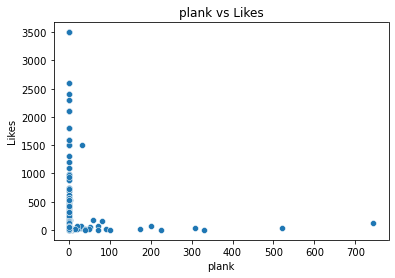

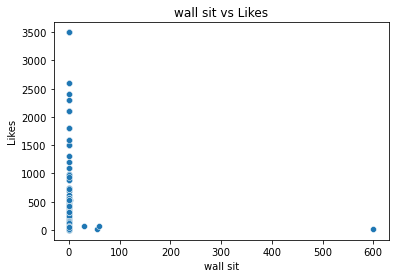

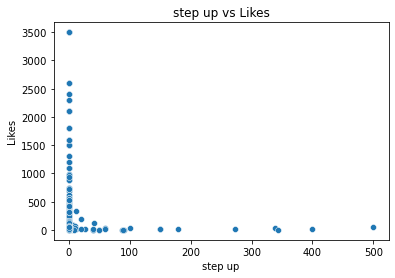

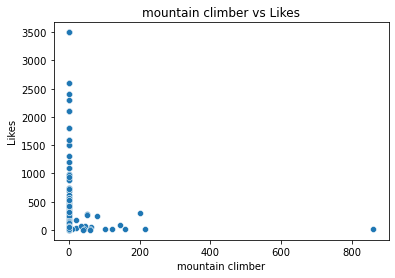

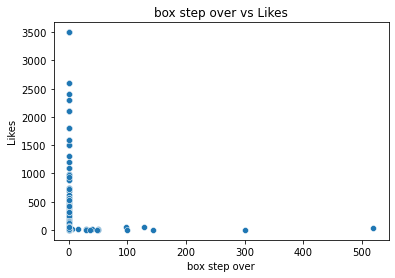

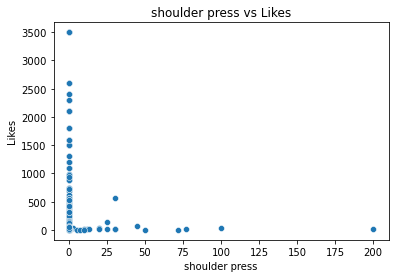

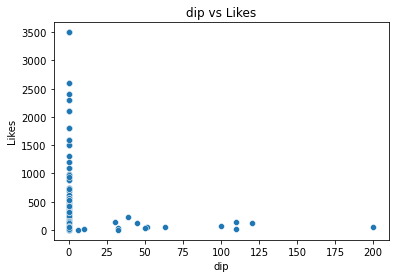

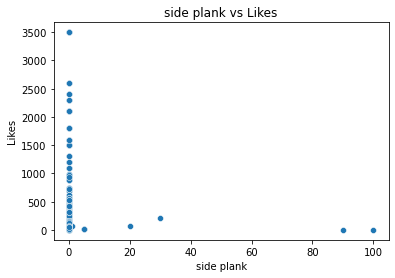

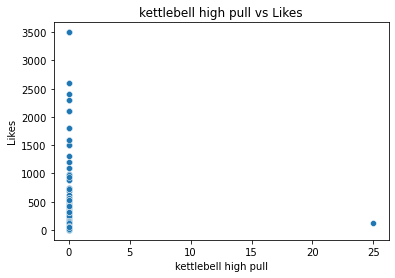

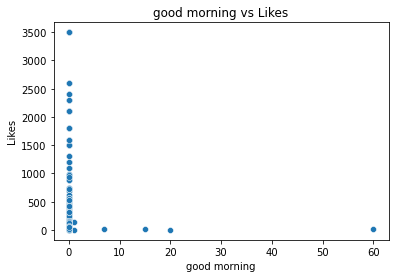

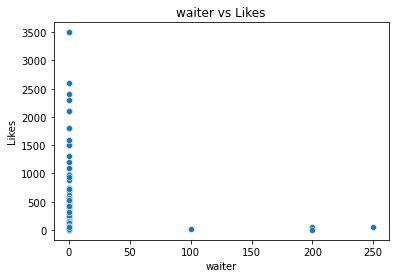

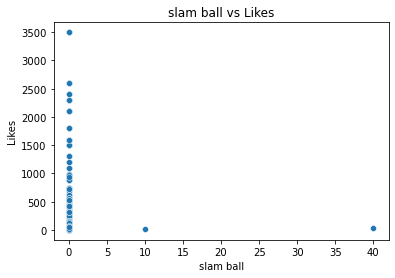

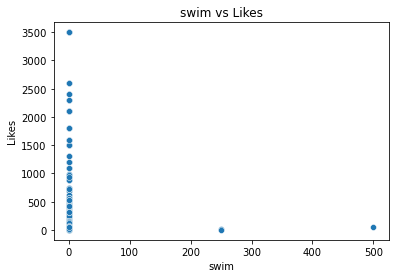

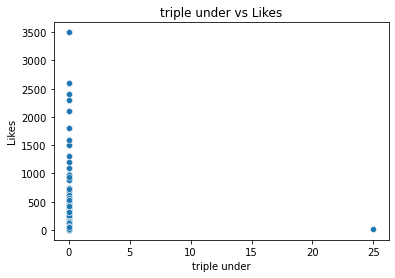

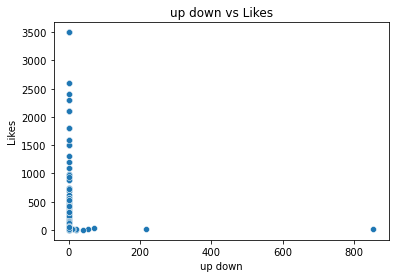

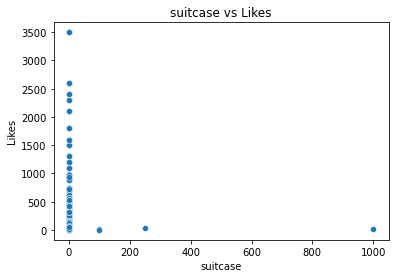

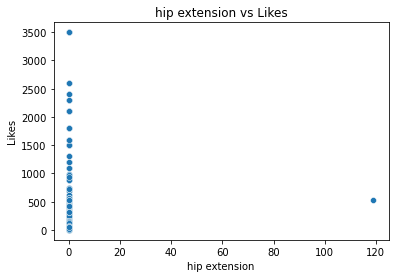

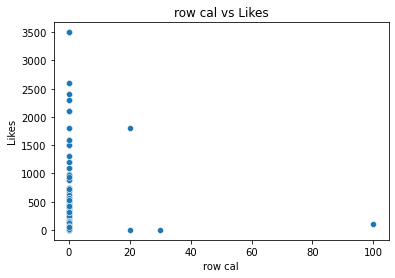

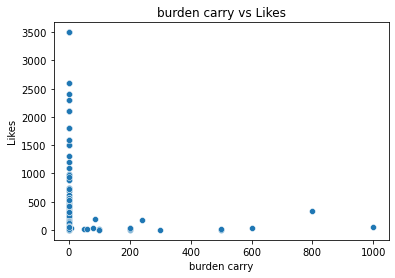

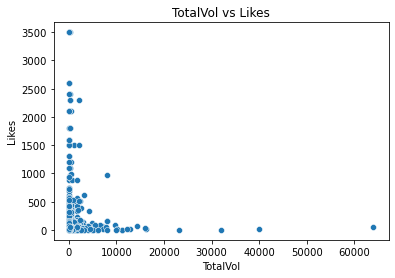

In [3]:
for name in wodsDF.columns[7:]:
    sns.scatterplot(x=name,y='Likes',data=wodsDF)
    plt.title(name+' vs Likes')
    plt.show()

We don't obviously see any trends here though it does seem loosley that higher volume push up and jerk workouts do get a few more likes.

We also want to investigate the workout format, done below:

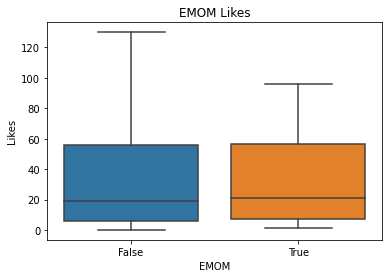

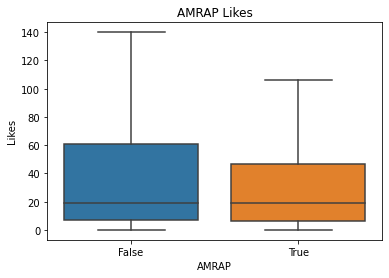

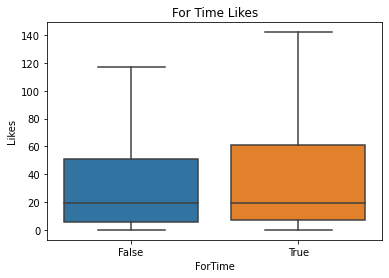

In [4]:
sns.boxplot(x='EMOM',y='Likes',data=wodsDF,showfliers=False)
plt.title('EMOM Likes')
plt.show()
sns.boxplot(x='AMRAP',y='Likes',data=wodsDF,showfliers=False)
plt.title('AMRAP Likes')
plt.show()
sns.boxplot(x='ForTime',y='Likes',data=wodsDF,showfliers=False)
plt.title('For Time Likes')
plt.show()

This seems to suggest that For Time and EMOM workouts are slightly more liked than AMRAP workouts. We also want to show what effect number of views has on our target.

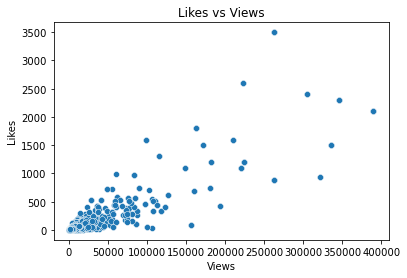

In [5]:
sns.scatterplot(x='Views',y='Likes',data=wodsDF)
plt.title('Likes vs Views')
plt.show()

We can see that generally as views increase, likes increase, though it doesnt appear to be linear, suggesting that more than just sheer volume impacts number of likes.

# Correlation

for more insight, we generate a correlation matrix and examine some more notable entries.

In [6]:
correlation = wodsDF.corr()
correlation

,Views,Likes,ForTime,EMOM,AMRAP,run,pull up,push up,air squat,deadlift,...,waiter,slam ball,swim,triple under,up down,suitcase,hip extension,row cal,burden carry,TotalVol
Views,1.000000,0.878641,0.052507,0.025101,-0.065858,-0.001336,0.047733,0.031774,0.034517,0.051601,...,-0.005776,-0.002883,-0.000487,-0.000097,-0.010537,-0.009145,0.026290,0.015721,0.018784,0.002738
Likes,0.878641,1.000000,0.044940,0.037431,-0.063434,-0.013648,0.036515,0.045894,0.047671,0.023147,...,-0.008325,-0.006127,-0.007764,-0.005936,-0.009305,-0.008335,0.034994,0.022438,-0.002302,-0.005821
ForTime,0.052507,0.044940,1.000000,-0.306346,-0.906668,-0.004792,-0.001743,-0.020801,0.019677,0.016996,...,0.028059,0.017708,-0.014829,0.014601,-0.035789,0.020353,0.014601,0.009816,-0.010270,-0.024405
EMOM,0.025101,0.037431,-0.306346,1.000000,-0.123809,-0.033996,0.000638,0.028990,0.055772,0.028141,...,-0.008596,-0.005425,-0.007307,-0.004473,0.127871,-0.006235,-0.004473,0.023874,-0.014115,0.073922
AMRAP,-0.065858,-0.063434,-0.906668,-0.123809,1.000000,0.020061,0.001534,0.008837,-0.045227,-0.030188,...,-0.025440,-0.016055,0.018696,-0.013238,-0.019359,-0.018453,-0.013238,-0.020813,0.016961,-0.007318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
suitcase,-0.009145,-0.008335,0.020353,-0.006235,-0.018453,-0.005067,-0.003412,-0.004934,-0.002872,-0.005961,...,-0.001281,-0.000809,-0.001089,-0.000667,-0.000975,1.000000,-0.000667,-0.001048,-0.002104,0.004371
hip extension,0.026290,0.034994,0.014601,-0.004473,-0.013238,-0.003635,-0.002448,-0.003540,-0.002060,-0.004276,...,-0.000919,-0.000580,-0.000781,-0.000478,-0.000699,-0.000667,1.000000,-0.000752,-0.001509,-0.003137
row cal,0.015721,0.022438,0.009816,0.023874,-0.020813,-0.005715,-0.003848,-0.005565,-0.003239,-0.006723,...,-0.001445,-0.000912,-0.001228,-0.000752,-0.001100,-0.001048,-0.000752,1.000000,-0.002373,-0.002866
burden carry,0.018784,-0.002302,-0.010270,-0.014115,0.016961,-0.009819,0.020641,0.028392,0.019507,0.037680,...,0.377046,0.113264,-0.002465,-0.001509,-0.002207,-0.002104,-0.001509,-0.002373,1.000000,-0.002732


In [7]:
correlation[correlation['Likes']>.02]['Likes']

Views             0.878641
Likes             1.000000
ForTime           0.044940
EMOM              0.037431
pull up           0.036515
push up           0.045894
air squat         0.047671
deadlift          0.023147
jerk              0.043061
row               0.022345
rest              0.033776
sit up            0.039569
thruster          0.058723
back extension    0.047179
ski               0.055330
bench press       0.051718
v up              0.033984
curtis p          0.130913
hip extension     0.034994
row cal           0.022438
Name: Likes, dtype: float64

In [8]:
correlation[correlation['Likes']<0]['Likes']

AMRAP                  -0.063434
run                    -0.013648
front squat            -0.006640
back squat             -0.010820
wall ball              -0.007165
burpee                 -0.015702
lunge                  -0.004653
handstand push up      -0.017202
bear crawl             -0.006690
double under           -0.012274
overhead squat         -0.004602
muscle up              -0.017020
bike                   -0.006174
wall walk              -0.011757
squat                  -0.026203
curl                   -0.002518
hollow rock            -0.006420
hollow hold            -0.003014
toes to bar            -0.006799
pistol                 -0.011582
sprint                 -0.007941
shoulder to overhead   -0.006550
sled pull              -0.010304
broad jump             -0.007625
single under           -0.003663
devil press            -0.011101
turkish get up         -0.000909
rope climb             -0.011598
handstand walk         -0.017944
burpee pull up         -0.004119
ring dip  

Using the correlation method as opposed to plotting graphs lets us filter out some of a noise caused by how relatively sparse our data is. For example, very few of our workouts have Curtis P's in them and so visually it can be hard to confirm whether or not they are well liked, but our correlation coefficient shows a positive .13 which is very high when compared to our other coefficients.

Unsurprisingly the feature with the highest correlation to a large number of likes is number of views. It is perhaps worth exploring a caculated variable of Likes Per View. We create such a variable below

In [9]:
wodsDF['LikesPerView'] = wodsDF['Likes']/wodsDF['Views']

In [10]:
correlation = wodsDF.corr()

In [11]:
correlation[correlation['LikesPerView']>.02]['LikesPerView']

Views                   0.053542
Likes                   0.231823
ForTime                 0.020356
EMOM                    0.031302
push up                 0.052874
air squat               0.088872
sit up                  0.100928
thruster                0.026324
kettlebell swing        0.107227
bench press             0.025228
squat                   0.033391
curl                    0.020841
v up                    0.087059
hollow hold             0.022937
curtis p                0.035143
single under            0.024925
mountain climber        0.021668
dip                     0.072535
kettlebell high pull    0.040127
LikesPerView            1.000000
Name: LikesPerView, dtype: float64

In [12]:
correlation[correlation['LikesPerView']<0]['LikesPerView']

AMRAP                  -0.035091
run                    -0.030421
pull up                -0.020787
clean                  -0.031595
complex                -0.013080
front squat            -0.021888
back squat             -0.024997
wall ball              -0.026680
box jump               -0.027330
burpee                 -0.007161
lunge                  -0.027338
clean and jerk         -0.024258
handstand push up      -0.031022
bear crawl             -0.029365
back extension         -0.020173
double under           -0.005026
overhead squat         -0.006887
ski                    -0.004759
muscle up              -0.079863
bike                   -0.005698
wall walk              -0.038927
toes to bar            -0.005183
pistol                 -0.053826
sprint                 -0.033505
shoulder to overhead   -0.018893
sled pull              -0.042202
broad jump             -0.031286
cluster                -0.004374
makers                 -0.004883
devil press            -0.009252
jumping ja

Using Likes Per View starts to give us a more balanced picture of our correlations. We see that some positive correlations start to be higher, with both sit ups and kettlebell swings being over .1 while we see some of the higher complexity movements and higher skill movements such as the clean, handstand push ups, and  rope climbing show a negative correlation. It's also worth noting that longer workouts tend to have less likes per view as total volume has a negative correlation.

Below we graph our movements against likes per view, filtering out points with 0 of the movement in them to see if we find any more obvious trends.

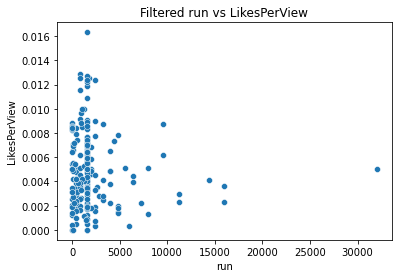

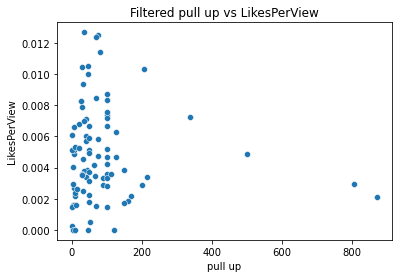

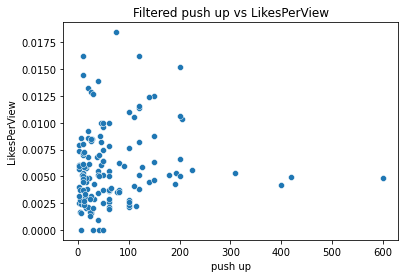

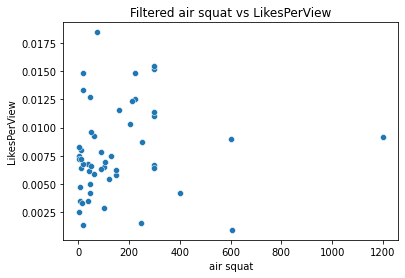

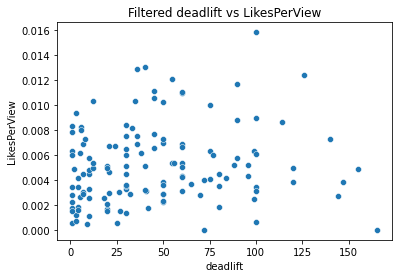

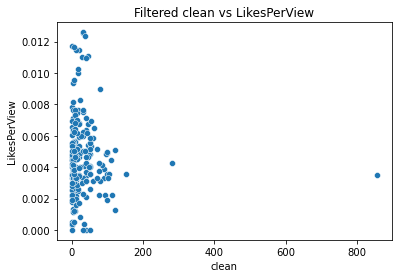

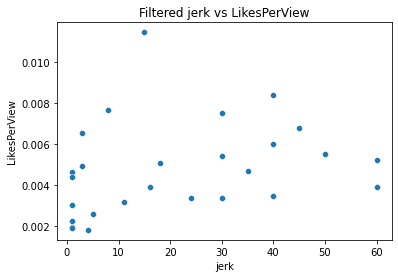

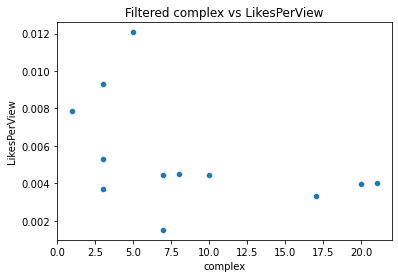

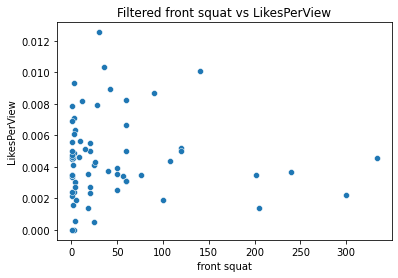

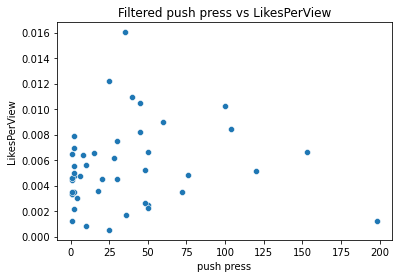

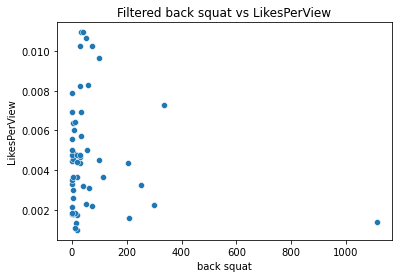

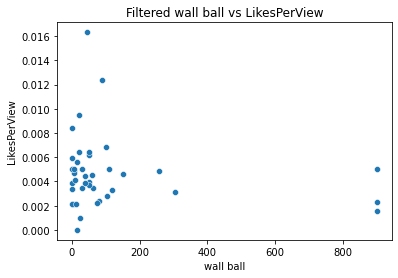

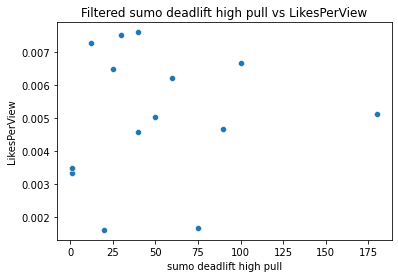

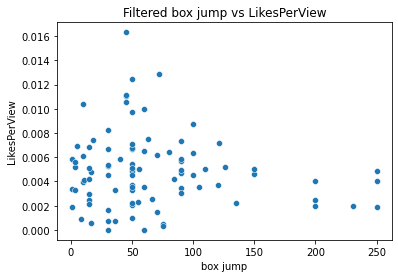

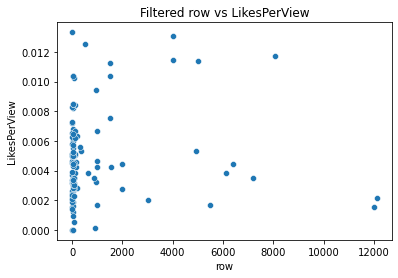

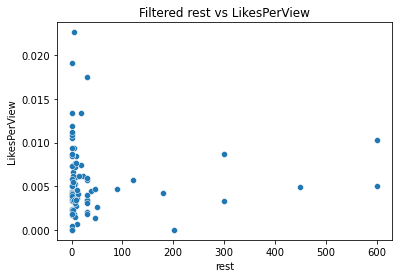

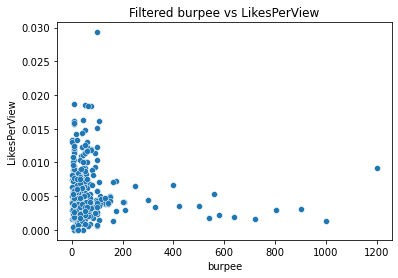

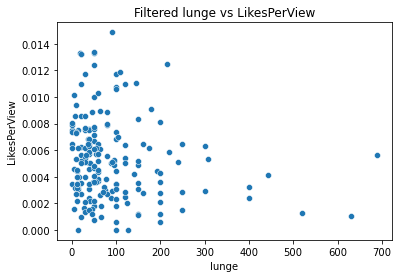

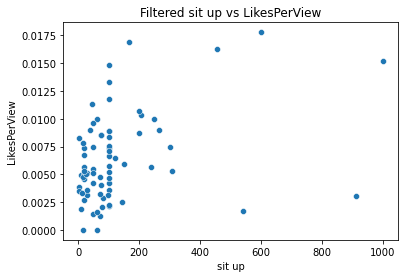

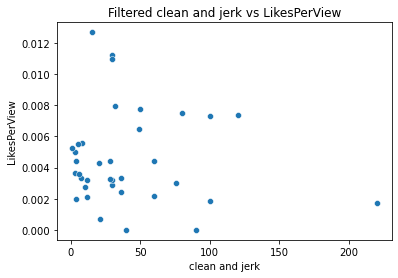

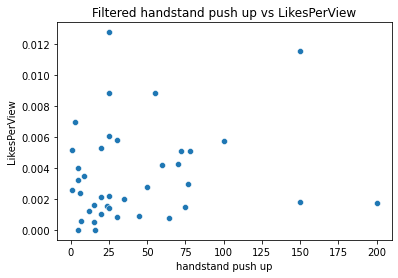

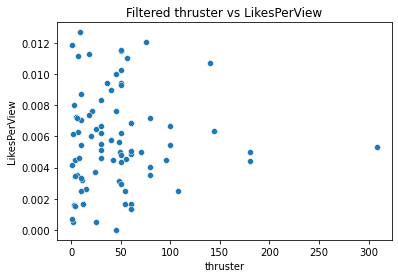

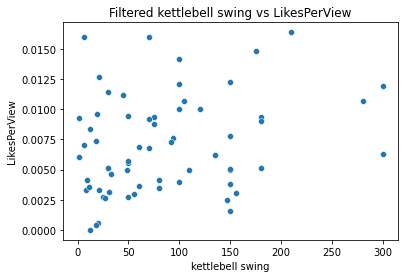

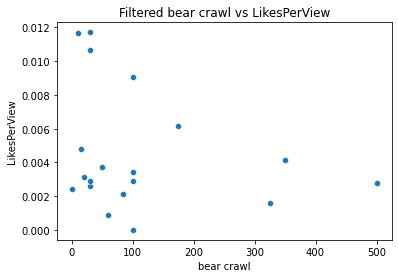

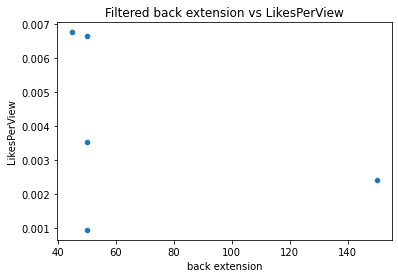

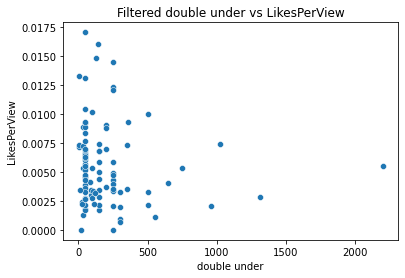

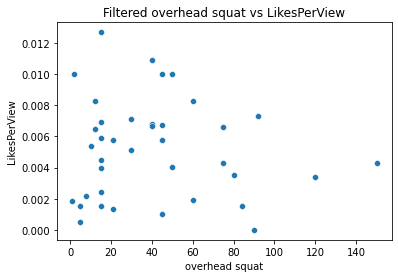

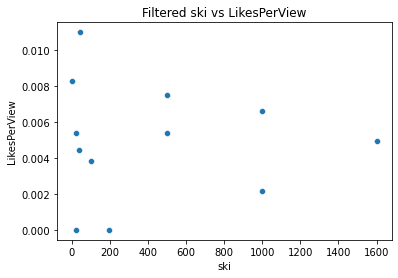

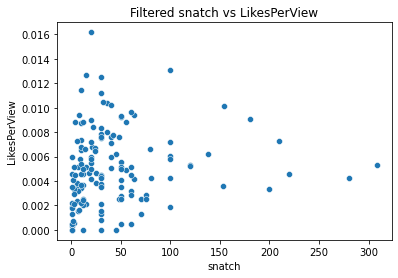

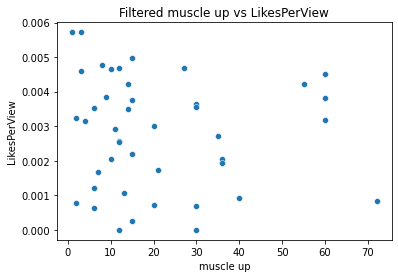

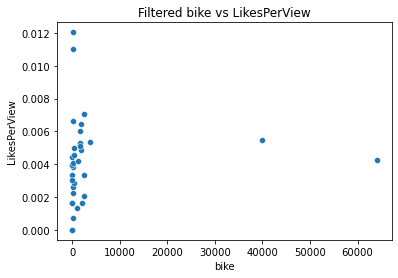

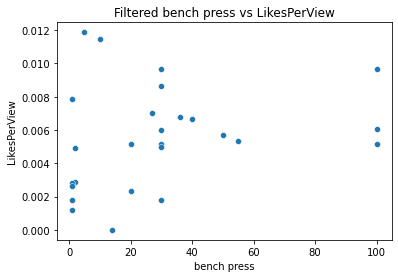

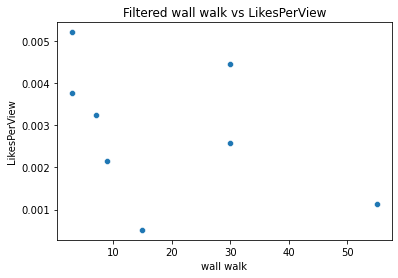

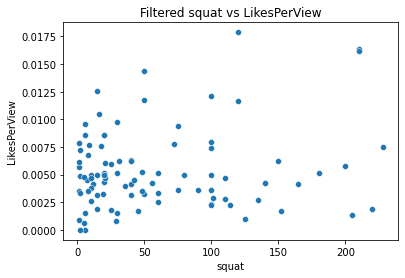

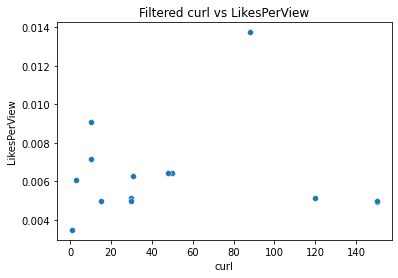

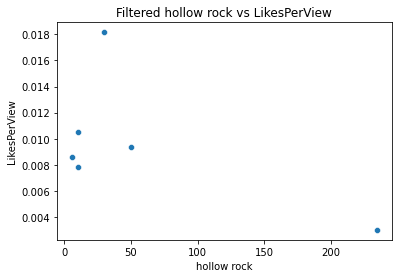

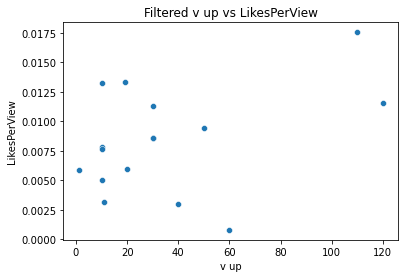

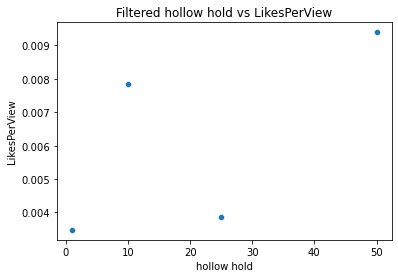

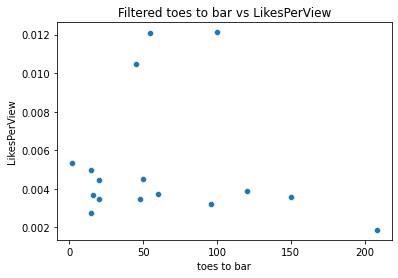

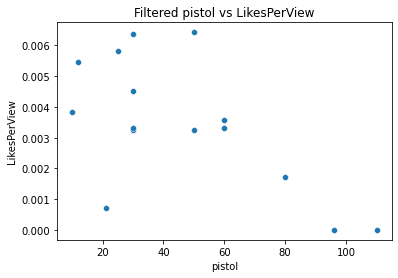

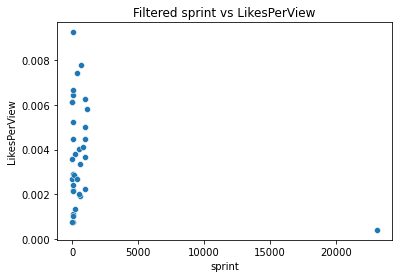

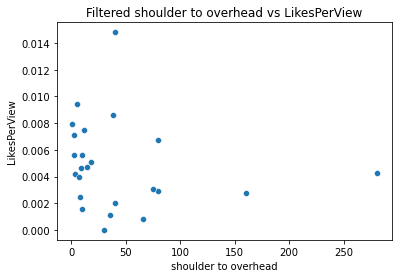

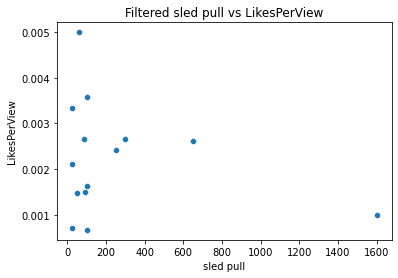

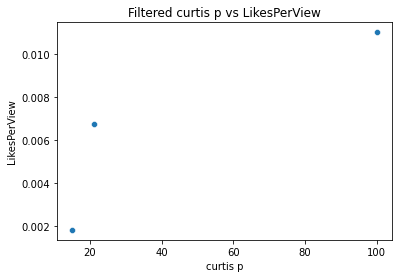

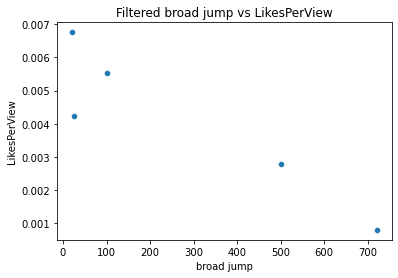

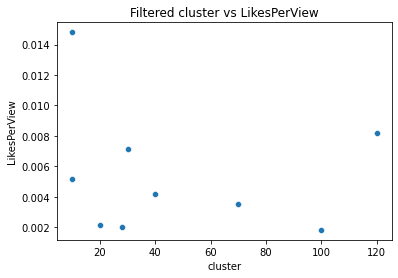

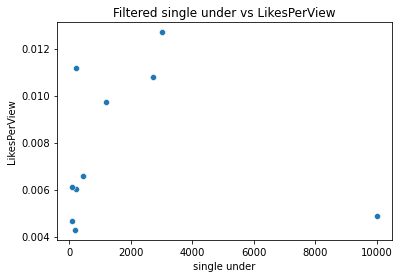

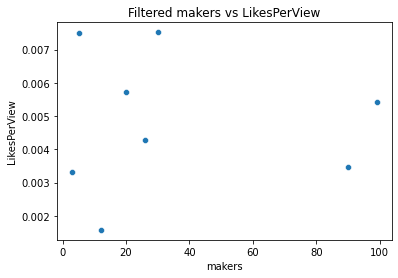

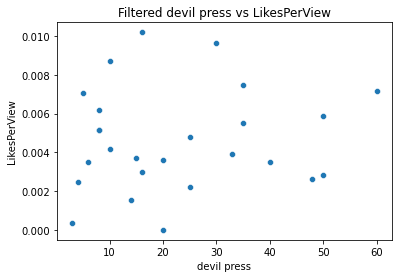

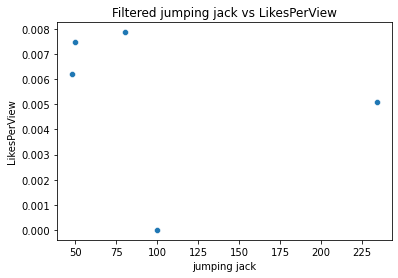

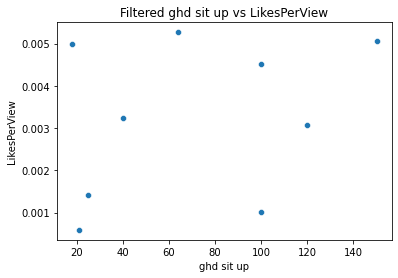

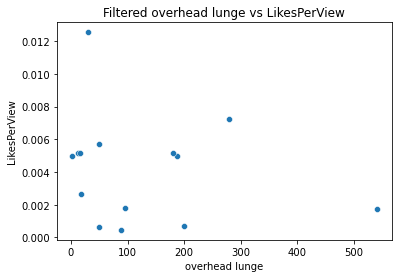

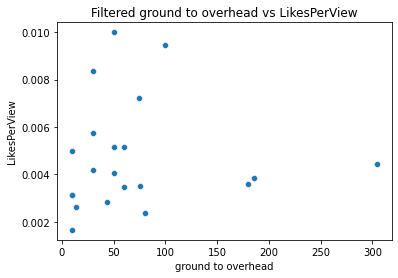

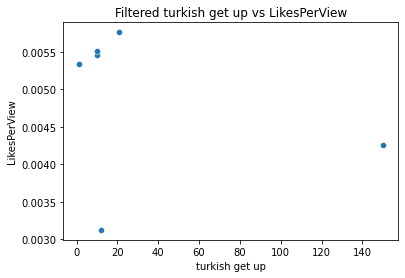

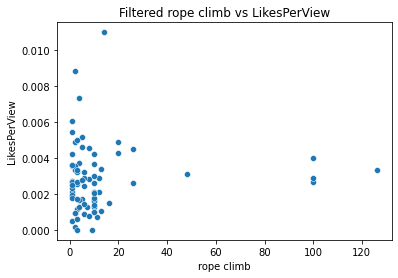

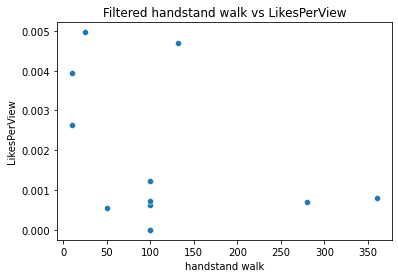

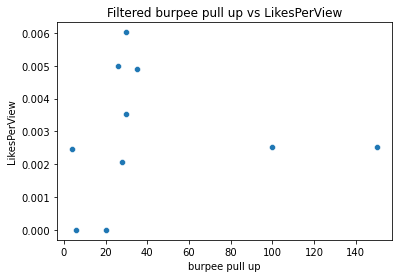

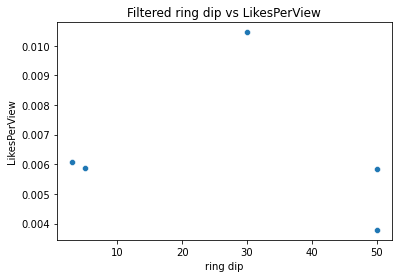

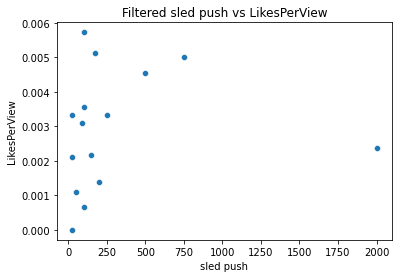

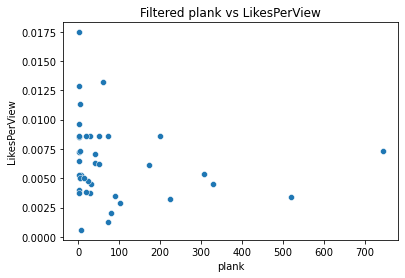

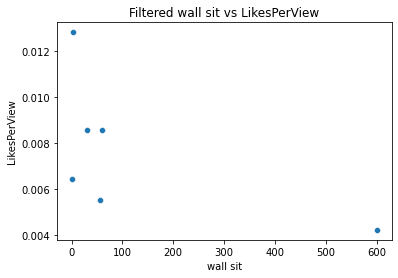

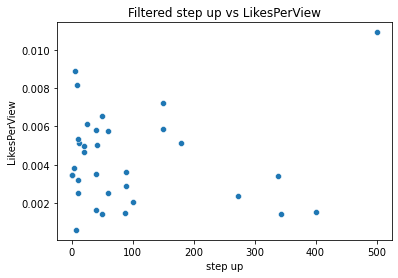

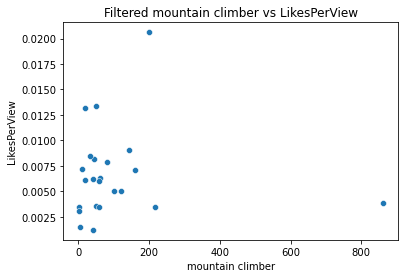

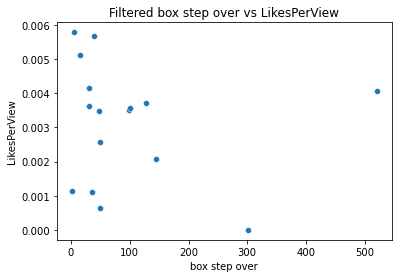

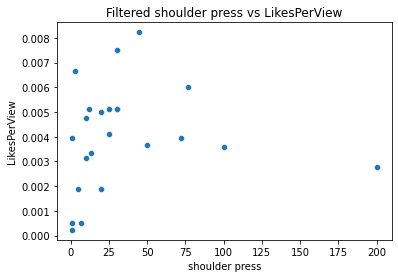

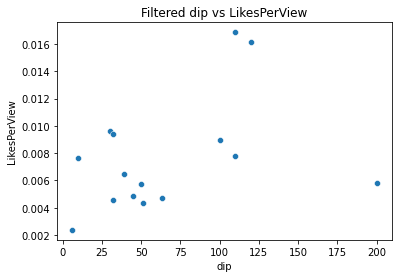

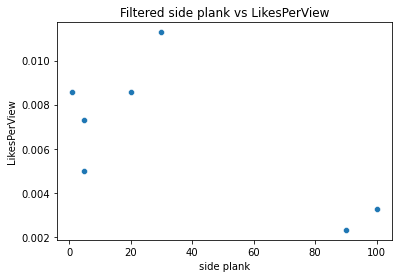

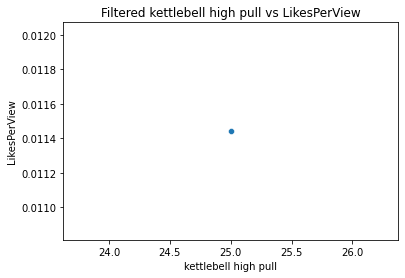

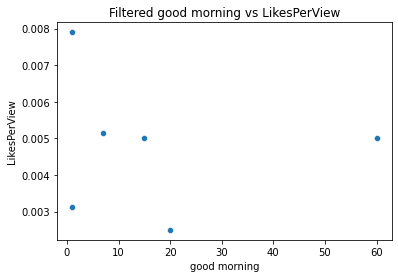

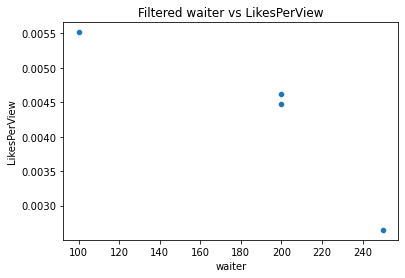

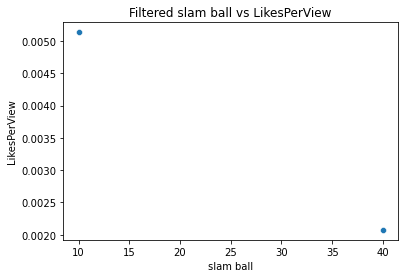

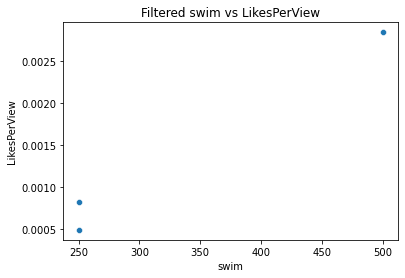

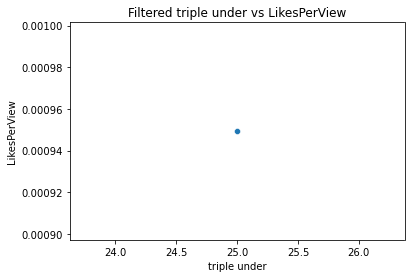

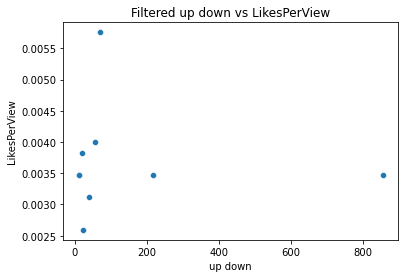

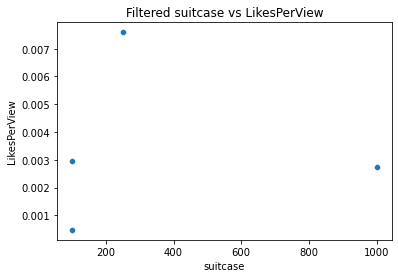

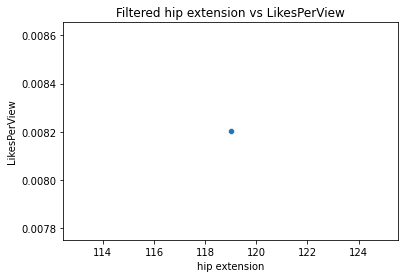

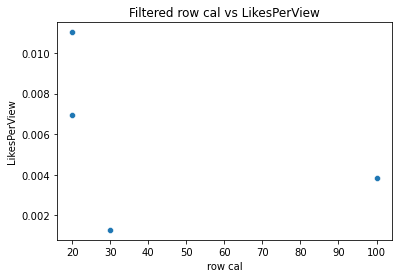

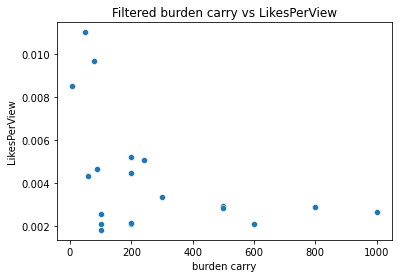

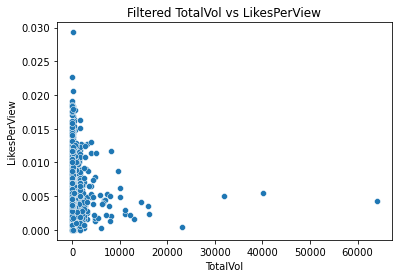

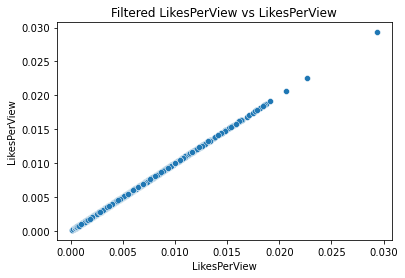

In [13]:
for name in wodsDF.columns[7:]:
    sns.scatterplot(x=name,y='LikesPerView',data=wodsDF[wodsDF[name]!=0])
    plt.title('Filtered '+name+' vs LikesPerView')
    plt.show()